<a href="https://colab.research.google.com/github/niruthikka24/USA-Accidents-Analysis/blob/main/Data_Viz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files, drive
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Old Dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec21_updated.csv')
# df = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv')
df1.shape

In [ ]:
df.shape

(2845342, 47)

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df['Timezone'].value_counts()

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64

In [ ]:
state_timezone = df[['State', 'Timezone']].drop_duplicates().dropna()
state_timezone['State'].value_counts()

Montana                 3
Alabama                 2
Tennessee               2
Indiana                 2
New Mexico              2
South Dakota            2
Wyoming                 2
North Dakota            2
Nebraska                2
Florida                 2
Kansas                  2
Georgia                 2
Louisiana               2
Colorado                2
Arizona                 2
Texas                   2
Utah                    2
Nevada                  2
California              2
Idaho                   2
Michigan                2
Oregon                  2
Kentucky                2
Illinois                2
Virginia                1
Delaware                1
Ohio                    1
District of Columbia    1
Maine                   1
Maryland                1
New Hampshire           1
Vermont                 1
Massachusetts           1
Arkansas                1
North Carolina          1
South Carolina          1
Rhode Island            1
Connecticut             1
New York    

In [ ]:
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

In [ ]:
# location, time, weather conditions, road conditions, and infrastructure
print(df['Start_Time'].min())
print(df['Start_Time'].max())

2016-01-14 20:18:33
2021-12-31 23:30:00


In [ ]:
#49 states
df['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [ ]:
df[df['State']=='CA'].count()['ID']

NameError: ignored

In [ ]:
states = df['State'].unique()
states_count = []
for i in states:
  states_count.append(df[df['State']==i].count()['ID'])

<Axes: >

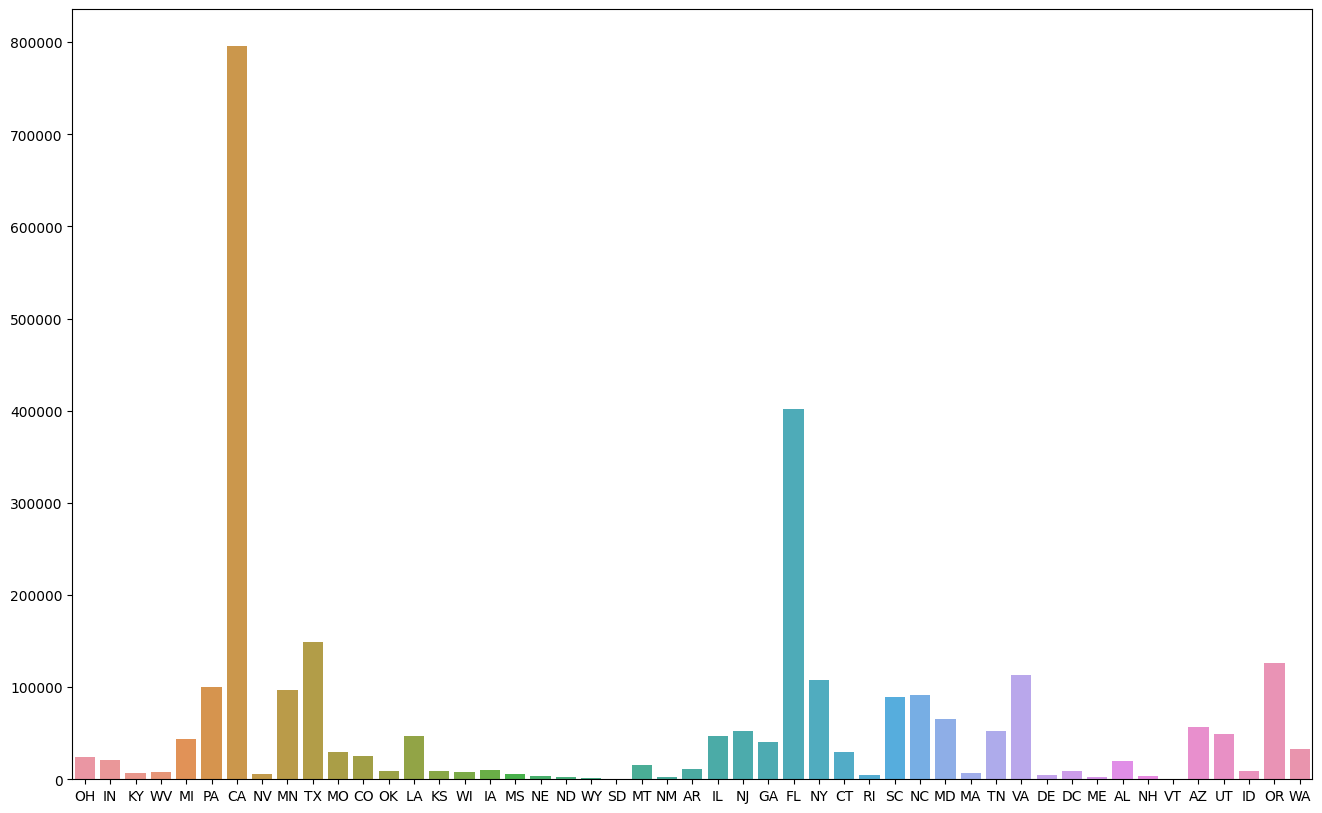

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(x=states,y=states_count)

In [ ]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [ ]:
549458/df.shape[0]

0.19310789353265795

In [ ]:
df[df['State']=='CA'][['Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
                      'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
                      'Precipitation(in)', 'Weather_Condition']].head()

,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
988,KTVL,2016-03-22 18:53:00,28.9,NaN,85.0,30.18,10.0,Calm,NaN,NaN,Clear
989,KRHV,2016-03-22 18:48:00,57.2,NaN,63.0,NaN,10.0,WNW,17.3,NaN,Scattered Clouds
990,KOAK,2016-03-22 19:53:00,57.0,NaN,64.0,30.24,10.0,NW,8.1,NaN,Partly Cloudy
991,KOAK,2016-03-22 21:53:00,55.0,NaN,67.0,30.26,10.0,NW,8.1,NaN,Clear
992,KMHR,2016-03-22 20:45:00,55.4,NaN,51.0,30.23,10.0,NNW,3.5,NaN,Clear


In [ ]:
df['Wind_Direction'].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [ ]:
len(df['Weather_Condition'].unique())

128

In [ ]:
rain_list = ['Light Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Rain', 'Heavy Rain', 'Drizzle',
             'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Light Freezing Rain', 'Heavy Rain / Windy',
             'Showers in the Vicinity','Rain Shower','Light Rain Shower', 'Light Freezing Rain / Windy', 'Heavy Rain Shower / Windy',
             'Freezing Rain', 'Freezing Drizzle', 'Heavy Freezing Drizzle', 'Heavy Freezing Rain', 'Heavy Rain Shower', 'Heavy Rain Showers',
             ]

cloudy_list = ['Overcast', 'Mostly Cloudy', 'Cloudy', 'Scattered Clouds', 'Partly Cloudy', 'Partly Cloudy / Windy',
               'Mostly Cloudy / Windy', 'Funnel Cloud']

snow_list = ['Snow', 'Light Snow', 'Blowing Snow', 'Heavy Snow', 'Snow Grains', 'Light Ice Pellets', 'Light Snow Showers',
             'Ice Pellets', 'Wintry Mix', 'Small Hail', 'Wintry Mix / Windy', 'Heavy Ice Pellets', 'Heavy Snow / Windy', 'Snow / Windy',
             'Light Snow and Sleet', 'Blowing Snow / Windy', 'Snow and Sleet', 'Light Sleet', 'Light Snow Shower',
             'Snow and Thunder / Windy', 'Hail', 'Blowing Snow Nearby', 'Thunder / Wintry Mix', 'Heavy Sleet', 'Sleet',
             'Snow and Sleet / Windy', 'Sleet / Windy', 'Drifting Snow', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Blowing Snow',
             'Heavy Snow with Thunder', ]

clear_list = ['Clear', 'Fair', 'N/A Precipitation']

dust_list = ['Haze', 'Smoke', 'Sand', 'Widespread Dust', 'Blowing Dust / Windy', 'Volcanic Ash', 'Dust Whirls', 'Haze / Windy',
             'Sand / Dust Whirlwinds', 'Smoke / Windy', 'Widespread Dust / Windy', 'Sand / Windy', 'Duststorm',
             'Sand / Dust Whirlwinds / Windy', 'Blowing Sand', 'Sand / Dust Whirls Nearby', 'Light Haze', 'Blowing Dust'
             ]

fog_list = ['Fog', 'Patches of Fog', 'Mist', 'Light Freezing Fog', 'Light Fog', 'Shallow Fog', 'Fog / Windy', 'Drizzle and Fog',
            'Partial Fog', 'Mist / Windy', 'Patches of Fog / Windy' ]

thunder_list = ['Thunderstorms and Rain', 'Light Thunderstorms and Rain', 'Heavy Thunderstorms and Rain',
                'Thunderstorm', 'Thunder', 'Thunder in the Vicinity', 'Light Rain with Thunder', 'Heavy Thunderstorms and Snow',
                'Light Thunderstorms and Snow', 'T-Storm', 'Heavy T-Storm', 'Heavy T-Storm / Windy', 'Thunder / Windy', 'T-Storm / Windy',
                'Light Snow with Thunder', 'Thunder and Hail', 'Thunder / Wintry Mix / Windy', 'Heavy Thunderstorms with Small Hail',
                'Thunder and Hail / Windy']

windy_list = ['Squalls', 'Cloudy / Windy', 'Fair / Windy', 'Rain / Windy', 'Light Rain / Windy', 'Freezing Rain / Windy',
              'Light Snow / Windy', 'Drizzle / Windy','Light Sleet / Windy', 'Light Drizzle / Windy', 'Tornado', 'Squalls / Windy',
              'Light Snow and Sleet / Windy', 'Light Rain Shower / Windy']

In [ ]:
# Create dictionary to map values
category_map = {x: 'rain' for x in rain_list}
category_map.update({x: 'cloudy' for x in cloudy_list})
category_map.update({x: 'snow' for x in snow_list})
category_map.update({x: 'clear' for x in clear_list})
category_map.update({x: 'dust' for x in dust_list})
category_map.update({x: 'fog' for x in fog_list})
category_map.update({x: 'thunderstorm' for x in thunder_list})
category_map.update({x: 'windy' for x in windy_list})

df['Weather_Condition'] = df['Weather_Condition'].map(category_map)

In [ ]:
df['Weather_Condition'].value_counts()

clear           1282096
cloudy          1102854
rain             183140
snow              55758
fog               45056
dust              44551
thunderstorm      32374
windy             28877
Name: Weather_Condition, dtype: int64

In [ ]:
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}
df['State'] = df['State'].map(us_states)

In [ ]:
df['State'].value_counts()

California              795868
Florida                 401388
Texas                   149037
Oregon                  126341
Virginia                113535
New York                108049
Pennsylvania             99975
Minnesota                97185
North Carolina           91362
South Carolina           89216
Maryland                 65085
Arizona                  56504
New Jersey               52902
Tennessee                52613
Utah                     49193
Louisiana                47232
Illinois                 47105
Michigan                 43843
Georgia                  40086
Washington               32554
Connecticut              29762
Missouri                 29633
Colorado                 25340
Ohio                     24409
Indiana                  20850
Alabama                  19322
Montana                  15964
Arkansas                 10935
Iowa                      9607
District of Columbia      9133
Kansas                    9033
Oklahoma                  8806
Idaho   

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
# Save DataFrame as a CSV file
df.to_csv('us_accident.csv', index=False)
# Download the CSV file
files.download('us_accident.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

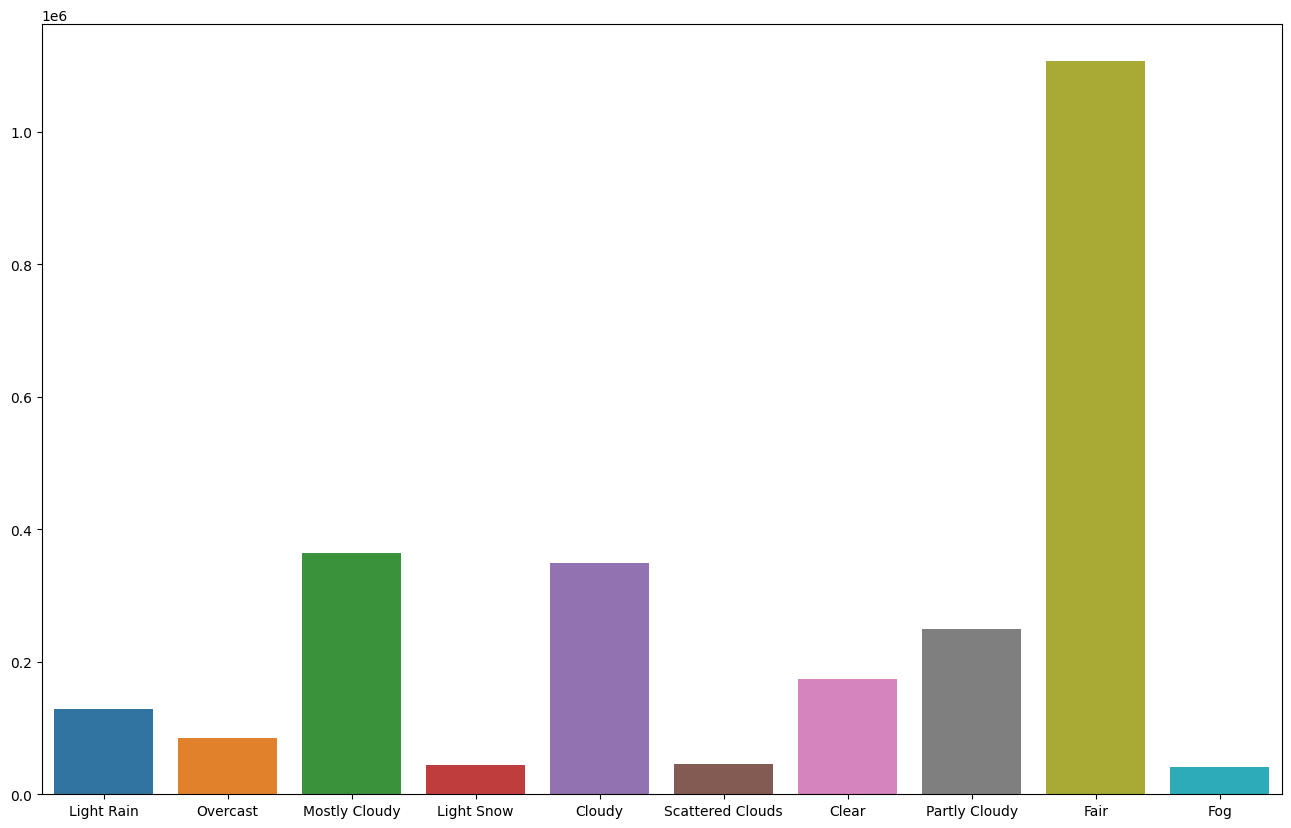

In [ ]:
weather_conditions = df['Weather_Condition'].unique()
weather_conditions_filtered = []
weather_conditions_count = []
for i in weather_conditions:
  i_count = df[df['Weather_Condition']==i].count()['ID']
  if i_count >= 41226:
    weather_conditions_filtered.append(i)
    weather_conditions_count.append(i_count)

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(x=weather_conditions_filtered,y=weather_conditions_count)

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.strftime('%b')
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.strftime('%a')
df['Duration'] = df['End_Time'] - df['Start_Time']
df['Duration_Min'] = round(df['Duration']/np.timedelta64(1,'m'))

In [ ]:
df[['Start_Time','End_Time','Year','Month','Day','Hour','Weekday','Duration','Duration_Min']].head()

,Start_Time,End_Time,Year,Month,Day,Hour,Weekday,Duration,Duration_Min
0,2016-02-08 00:37:08,2016-02-08 06:37:08,2016,Feb,8,0,Mon,0 days 06:00:00,360.0
1,2016-02-08 05:56:20,2016-02-08 11:56:20,2016,Feb,8,5,Mon,0 days 06:00:00,360.0
2,2016-02-08 06:15:39,2016-02-08 12:15:39,2016,Feb,8,6,Mon,0 days 06:00:00,360.0
3,2016-02-08 06:51:45,2016-02-08 12:51:45,2016,Feb,8,6,Mon,0 days 06:00:00,360.0
4,2016-02-08 07:53:43,2016-02-08 13:53:43,2016,Feb,8,7,Mon,0 days 06:00:00,360.0


In [ ]:
df['Duration_Min'].value_counts()

360.0      353955
30.0       122553
29.0        74190
75.0        68392
78.0        64745
            ...  
1835.0          1
3274.0          1
11036.0         1
11553.0         1
6277.0          1
Name: Duration_Min, Length: 5794, dtype: int64

In [ ]:
df['Duration_Min'].describe()

count    2.845342e+06
mean     3.590377e+02
std      9.329918e+03
min      2.000000e+00
25%      7.400000e+01
50%      1.200000e+02
75%      2.240000e+02
max      1.682579e+06
Name: Duration_Min, dtype: float64

In [ ]:
print(df['Duration_Min'].min())
print(df['Duration_Min'].max())

2.0
1682579.0


In [ ]:
# df[df['Duration_Min']==1682579]['Description']
df.loc[415412]['Description']

'Incident on I-95 SB near US-301 Drive with caution.'

In [ ]:
df['Severity'].value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [ ]:
len(df['Country'].unique())

1

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'Duration', 'Duration_Min'],
      dtype='object')

In [ ]:
print(df['Sunrise_Sunset'].unique())
print(df['Civil_Twilight'].unique())
print(df['Nautical_Twilight'].unique())
print(df['Astronomical_Twilight'].unique())

['Night' 'Day' nan]
['Night' 'Day' nan]
['Night' 'Day' nan]
['Night' 'Day' nan]


In [ ]:
print("Sunrise-Sunset -> Civil difference", df[df['Sunrise_Sunset']!=df['Civil_Twilight']].shape[0]/df.shape[0])
print("Sunrise-Sunset -> Nautical difference", df[df['Sunrise_Sunset']!=df['Nautical_Twilight']].shape[0]/df.shape[0])
print("Sunrise-Sunset -> Astronomical difference", df[df['Sunrise_Sunset']!=df['Astronomical_Twilight']].shape[0]/df.shape[0])

print("Civil -> Nautical difference", df[df['Nautical_Twilight']!=df['Civil_Twilight']].shape[0]/df.shape[0])
print("Civil -> Astronomical difference", df[df['Astronomical_Twilight']!=df['Civil_Twilight']].shape[0]/df.shape[0])

print("Astronomical -> Nautical difference", df[df['Nautical_Twilight']!=df['Astronomical_Twilight']].shape[0]/df.shape[0])

Sunrise-Sunset -> Civil difference 0.04220336254833338
Sunrise-Sunset -> Nautical difference 0.08941069298523692
Sunrise-Sunset -> Astronomical difference 0.13065740427688483
Civil -> Nautical difference 0.04823181185249436
Civil -> Astronomical difference 0.08953826991623502
Astronomical -> Nautical difference 0.042423019798674466


In [ ]:
city_state[city_state['City']=='Miami']

,State,City
29519,OK,Miami
31596,FL,Miami
91423,AZ,Miami
268698,WV,Miami


In [ ]:
df['State-City'] = df['State'] + '-' + df['City']
df[['State-City', 'State', 'City']].head()

,State-City,State,City
0,OH-Dublin,OH,Dublin
1,OH-Dayton,OH,Dayton
2,OH-Cincinnati,OH,Cincinnati
3,OH-Akron,OH,Akron
4,OH-Cincinnati,OH,Cincinnati


In [ ]:
df[df['State-City']=='OH-Dublin'].iloc[0]['State']

'OH'

In [ ]:
top_30_cities = df['State-City'].value_counts()[:30].index.tolist()
state_list = []
city_list = []
accident_count_list = []
accident_pcnt_list = []
top_10_states = df['State'].value_counts()[:10].index.tolist()
in_top_states_list = []
total_accident_count = df.shape[0]

for i in top_30_cities:
  accident_count = df[df['State-City']==i].count()['ID']
  accident_count_list.append(accident_count)
  accident_pcnt = (accident_count/total_accident_count)*100
  accident_pcnt_list.append(round(accident_pcnt,2))
  state_list.append(i.split('-')[0])
  city_list.append(i.split('-')[1])
  if i.split('-')[0] in top_10_states:
    in_top_states_list.append(True)
  else:
    in_top_states_list.append(False)


In [ ]:
city_state_df = pd.DataFrame({'City': city_list, 'State': state_list,
                              'Accident_Count': accident_count_list, 'Accident_Percentage': accident_pcnt_list,
                              'In_Top_10_States':in_top_states_list,
                              })

In [ ]:
city_state_df

,City,State,Accident_Count,Accident_Percentage,In_Top_10_States
0,Miami,FL,106896,3.76,True
1,Los Angeles,CA,68956,2.42,True
2,Orlando,FL,54654,1.92,True
3,Dallas,TX,41615,1.46,True
4,Houston,TX,39366,1.38,True
5,Charlotte,NC,32998,1.16,True
6,Sacramento,CA,32559,1.14,True
7,San Diego,CA,26627,0.94,True
8,Raleigh,NC,22837,0.80,True
9,Minneapolis,MN,22768,0.80,True


In [ ]:
city_state_df[city_state_df['In_Top_10_States']==False].shape[0]/30

NameError: ignored

# New Dataset

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec21_updated.csv')
df = pd.read_csv('/content/drive/MyDrive/us_accident.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
print(df[df['State']=='California'].shape[0] / df.shape[0])
print(df[(df['State']=='California') & (df['County'] == 'Los Angeles')].shape[0] / df[df['State']=='California'].shape[0])

0.27970908242313225
0.29417189785240766


In [ ]:
df[df['State']=='Arizona'].shape[0]
df[(df['State']=='Arizona') & (df['Severity']==4)].shape[0]

3902

In [ ]:
df[(df['State']=='California') & (df['Severity'] == 1)].shape[0]

5058

In [ ]:
df[(df['State']=='Arizona') & (df['County'] == 'Maricopa')].shape[0]

33539

In [ ]:
us_states_timezones = {
    'Alabama': 'US/Central',
    'Alaska': 'US/Alaska',
    'Arizona': 'US/Mountain',
    'Arkansas': 'US/Central',
    'California': 'US/Pacific',
    'Colorado': 'US/Mountain',
    'Connecticut': 'US/Eastern',
    'Delaware': 'US/Eastern',
    'District of Columbia': 'US/Eastern',
    'Florida': 'US/Eastern',
    'Georgia': 'US/Eastern',
    'Hawaii': 'US/Hawaii',
    'Idaho': 'US/Mountain',
    'Illinois': 'US/Central',
    'Indiana': 'US/Eastern',
    'Iowa': 'US/Central',
    'Kansas': 'US/Central',
    'Kentucky': 'US/Eastern',
    'Louisiana': 'US/Central',
    'Maine': 'US/Eastern',
    'Maryland': 'US/Eastern',
    'Massachusetts': 'US/Eastern',
    'Michigan': 'US/Eastern',
    'Minnesota': 'US/Central',
    'Mississippi': 'US/Central',
    'Missouri': 'US/Central',
    'Montana': 'US/Mountain',
    'Nebraska': 'US/Central',
    'Nevada': 'US/Pacific',
    'New Hampshire': 'US/Eastern',
    'New Jersey': 'US/Eastern',
    'New Mexico': 'US/Mountain',
    'New York': 'US/Eastern',
    'North Carolina': 'US/Eastern',
    'North Dakota': 'US/Central',
    'Ohio': 'US/Eastern',
    'Oklahoma': 'US/Central',
    'Oregon': 'US/Pacific',
    'Pennsylvania': 'US/Eastern',
    'Rhode Island': 'US/Eastern',
    'South Carolina': 'US/Eastern',
    'South Dakota': 'US/Central',
    'Tennessee': 'US/Central',
    'Texas': 'US/Central',
    'Utah': 'US/Mountain',
    'Vermont': 'US/Eastern',
    'Virginia': 'US/Eastern',
    'Washington': 'US/Pacific',
    'West Virginia': 'US/Eastern',
    'Wisconsin': 'US/Central',
    'Wyoming': 'US/Mountain'
}
df['Timezone'] = df['State'].map(us_states_timezones)

In [ ]:
df['Timezone'].value_counts()

US/Eastern     1225974
US/Pacific      960960
US/Central      499503
US/Mountain     158905
Name: Timezone, dtype: int64

In [ ]:
df['Timezone'].isna().sum()

0

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df1 = df.drop(['Number', 'Wind_Chill(F)', 'Precipitation(in)'], axis=1)

In [ ]:
# Save DataFrame as a CSV file
df1.to_csv('us_accident.csv', index=False)
# Download the CSV file
files.download('us_accident.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dataset Version 3

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/us_accident_new.csv')

In [ ]:
df['Infra_Combo'] = df.apply(lambda row: '-'.join(df.columns[row == True]), axis=1)

In [ ]:
df['Infra_Combo'].value_counts()

                                                            2068286
Junction                                                     275648
Traffic_Signal                                               135433
Crossing-Traffic_Signal                                       77583
Crossing                                                      58326
                                                             ...   
Crossing-Junction-No_Exit-Stop                                    1
Distance(mi)-Visibility(mi)-Stop                                  1
Crossing-No_Exit-Station-Stop-Traffic_Signal                      1
Crossing-Give_Way-Junction-Station-Traffic_Signal                 1
Amenity-Give_Way-Junction-Railway-Station-Traffic_Signal          1
Name: Infra_Combo, Length: 474, dtype: int64